In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import oauth2 as oa
import json

In [5]:
with open('twitter_config.json') as f:
    tokens = json.loads(f.read())

consumer = oa.Consumer(key=tokens['CONSUMER_KEY'],secret=tokens['CONSUMER_SECRET'])
token = oa.Token(key=tokens['ACCESS_TOKEN'],secret=tokens['ACCESS_SECRET'])

client = oa.Client(consumer,token)

## Twitter's REST APIs

Twitter has a rich set of API calls (full list is listed at https://dev.twitter.com/rest/public). Today we'll be using these:

* [GET friends/list](https://dev.twitter.com/rest/reference/get/friends/list) - who is user X is following?
* [GET followers/list](https://dev.twitter.com/rest/reference/get/followers/list) - who follows user X?

## GET followers/list: let's find out who follows you!
You'll see from the [GET followers/list](https://dev.twitter.com/rest/reference/get/followers/list) documentation that the URL to get the list of followers is:

    https://api.twitter.com/1.1/followers/list.json?screen_name=[screen_name]

Which returns:

1) A response body

* JSON representing the data we requested

2) A response header

* There's a lot of stuff here, but one param to note are the **HTTP Response Codes**, which will tell you if the request was successful. Or if not, why. The ones you should note are:

* **200 - STATUS_OKAY** - <font color="#009900">Success :) </font> . This is what you want.

* **429 - RATE_LIMIT_EXCEEDED.** <font color="#990000">Uh-oh, slow it down :/</font>. Twitter limits how frequently you can make requests, and you've exceeded it.
* **401 - UNAUTHORIZED_USER**. Twitter isn't accepting your Consumer/Access tokens. Verify tokens were pasted correctly, or try generating new tokens.
 

Now that we know what to expect, let's try it!

In [9]:
FOLLOWERS_URL = "https://api.twitter.com/1.1/followers/list.json?"
screen_name = 'ImRo45'
url = FOLLOWERS_URL+'?screen_name='+screen_name
header,response = client.request(url,method='GET')

In [10]:
print("Status : ",header['status'])

Status :  200


In [25]:
print(response[:200])

b'{"users":[{"id":3107048520,"id_str":"3107048520","name":"stiffy_prince","screen_name":"nalinikanta00","location":"","description":"","url":null,"entities":{"description":{"urls":[]}},"protected":false'


# Working with Twitter Retweets Data

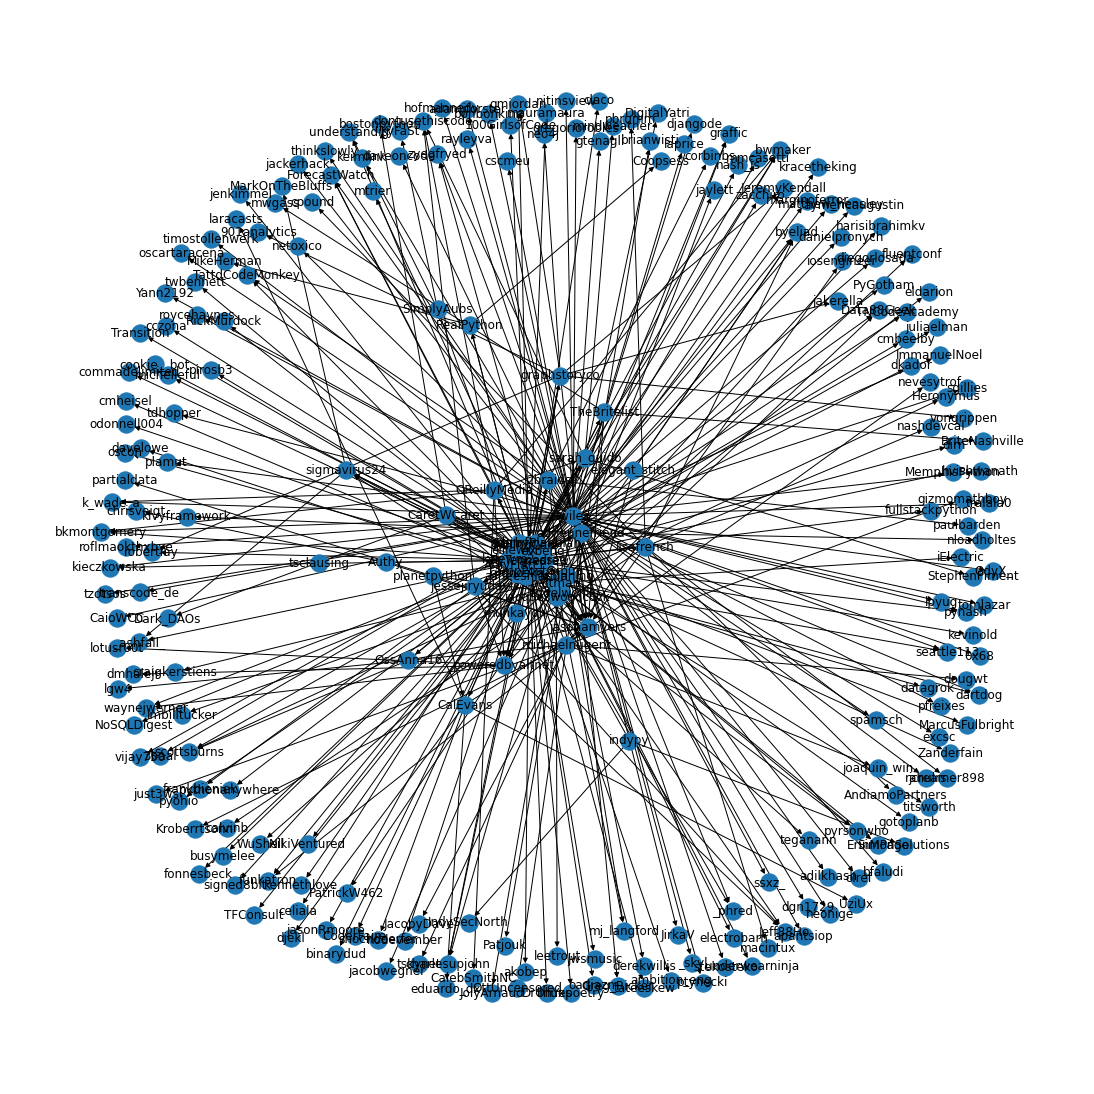

In [29]:
G = nx.read_edgelist('retweets.txt',create_using=nx.DiGraph())
plt.figure(figsize=(15,15))
nx.draw(G,with_labels=True)

In [30]:
LAYOUTS = {
    'circular' : nx.circular_layout,
    'fr' : nx.fruchterman_reingold_layout,
    'random' : nx.random_layout,
    'spell' : nx.shell_layout,
    'spectral' : nx.spectral_layout,
    'spring' : nx.spring_layout 
}